In [1]:
import datetime
import os

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go

import numpy as np

from obs_data import *

print(os.getcwd())

/Users/DayTightChunks/Documents/PhD/Models/.nosync/pesti-beach16/Analysis


In [2]:
init_notebook_mode(connected=True)

In [3]:
variable = "Smet Conc"

## Observed

### Composites

In [4]:
n_obs = getSoilData("North", tss=True)
v_obs = getSoilData("Valley", tss=True)
s_obs = getSoilData("South", tss=True)
s_obs.head()

,DayMoYr,Date,Jdays,ID,Transect,Wnum,Date.Soil,Date.ti,Conc.mug.g.dry.soil,Conc.ComSoil.SD,Mass.Soil.g,theta.prct,N_compsoil,comp.d13C,comp.d13C.SD,N_isoComp,prctError,DD13C.comp,comp.IMP.d13C
0,2015-10-01,01/10/2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-02,02/10/2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-03,03/10/2015,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-04,04/10/2015,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-05,05/10/2015,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
if variable == "d13C":
    name = "comp.d13C"
else:
    name = 'Conc.mug.g.dry.soil'

nConc = n_obs[name].tolist()
vConc = v_obs[name].tolist()
sConc = s_obs[name].tolist()

### Detailed

In [6]:
det_name = "ug.g"
n1 = getDetailed("N1.tss")
n1 = n1[det_name].tolist()

n2 = getDetailed("N2.tss")
n2 = n2[det_name].tolist()

# Valley
t4 = getDetailed("t4.tss")
t5 = getDetailed("t5.tss")
t7 = getDetailed("t7.tss")
t8 = getDetailed("t8.tss")
t9 = getDetailed("t9.tss")
t10 = getDetailed("t10.tss")

t4 = t4[det_name].tolist()
t5 = t5[det_name].tolist()
t7 = t7[det_name].tolist()
t8 = t8[det_name].tolist()
t9 = t9[det_name].tolist()
t10 = t10[det_name].tolist()

# South
s11 = getDetailed("s11.tss")
s11 = s11[det_name].tolist()

s12 = getDetailed("s12.tss")
s12 = s12[det_name].tolist()

s13 = getDetailed("s13.tss")
s13 = s13[det_name].tolist()

## Simulated

In [7]:
# Model version and mc-run number:
version = "v10"
folder = "1"

# Working computer
PC = False
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

v10/


In [8]:
# Time series name
col = 'sim' 
name_tss = 'CONC'

In [9]:
transect = 'nor'
filename = "resM_" + transect + name_tss + ".tss"
c_north_sim = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)

simN = c_north_sim[col].tolist()

In [10]:
transect = 'val'
filename = "resM_" + transect + name_tss + ".tss"
c_val_sim = pd.read_table(sim_path + folder + back + 
                          filename, 
                          skiprows=4, delim_whitespace=True,
                          names=['Jdays', col],
                          header=None)

simV = c_val_sim[col].tolist()

In [11]:
transect = 'sou'
filename = "resM_" + transect + name_tss + ".tss"
c_sou_sim = pd.read_table(sim_path + folder + back + 
                          filename, skiprows=4, delim_whitespace=True,
                          names=['Jdays', col],
                          header=None)

simS = c_sou_sim[col].tolist()

## Plotting

In [12]:
# Julian days
# x = s_obs.Jdays.tolist()

dates = getTime(sep=";")
x = dates.Date.tolist()

start = 175
end = 300

### Observed

#### Composites

In [13]:
nObs = go.Scatter(
    x = x[start:end],
    y = nConc[start:end],
    mode = 'markers',
    name = 'North '  + variable,
    marker=dict(
        color= 'red', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=10)
)

vObs = go.Scatter(
    x = x[start:end],
    y = vConc[start:end],
    mode = 'markers',
    name = 'Valley ' + variable,
    marker=dict(
        color= 'green', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=10)
)

sObs = go.Scatter(
    x = x[start:end],
    y = sConc[start:end],
    mode = 'markers',
    name = 'South ' + variable,
    marker=dict(
        color= 'blue', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=10)
)



#### Detailed

In [14]:
n1obs = go.Scatter(
    x = x[start:end],
    y = n1[start:end],
    mode = 'markers',
    name = 'N1',
    marker=dict(
        color= 'red', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)

n2obs = go.Scatter(
    x = x[start:end],
    y = n2[start:end],
    mode = 'markers',
    name = 'N2',
    marker=dict(
        color= 'red', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)


s11obs = go.Scatter(
    x = x[start:end],
    y = s11[start:end],
    mode = 'markers',
    name = 'S11',
    marker=dict(
        color= 'blue', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)

s12obs = go.Scatter(
    x = x[start:end],
    y = s12[start:end],
    mode = 'markers',
    name = 'S12',
    marker=dict(
        color= 'blue', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)

s13obs = go.Scatter(
    x = x[start:end],
    y = s13[start:end],
    mode = 'markers',
    name = 'S13',
    marker=dict(
        color= 'blue', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)

t4obs = go.Scatter(
    x = x[start:end],
    y = t4[start:end],
    mode = 'markers',
    name = 'T4',
    marker=dict(
        color= 'green', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)
t5obs = go.Scatter(
    x = x[start:end],
    y = t5[start:end],
    mode = 'markers',
    name = 'T5',
    marker=dict(
        color= 'green', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)
t7obs = go.Scatter(
    x = x[start:end],
    y = t7[start:end],
    mode = 'markers',
    name = 'T7',
    marker=dict(
        color= 'green', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)
t8obs = go.Scatter(
    x = x[start:end],
    y = t8[start:end],
    mode = 'markers',
    name = 'T8',
    marker=dict(
        color= 'green', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)
t9obs = go.Scatter(
    x = x[start:end],
    y = t9[start:end],
    mode = 'markers',
    name = 'T9',
    marker=dict(
        color= 'green', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)
t10obs = go.Scatter(
    x = x[start:end],
    y = t10[start:end],
    mode = 'markers',
    name = 'T10',
    marker=dict(
        color= 'green', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='star',
        size=10)
)

### Simulated

In [15]:
traceN = go.Scatter(
    x = x[start:end],
    y = simN[start:end],
    mode = 'lines',
    name = 'North Sim.',
    marker=dict(
        color= 'red')
)

traceV = go.Scatter(
    x = x[start:end],
    y = simV[start:end],
    mode = 'lines',
    name = 'Valley Sim.',
    marker=dict(
        color='green')
)

traceS = go.Scatter(
    x = x[start:end],
    y = simS[start:end],
    mode = 'lines',
    name = 'South Sim.',
    marker=dict(
        color= 'blue')
)


In [17]:
data = [nObs, vObs, sObs, traceN, traceV, traceS,
       # n1obs, n2obs, s11obs, s12obs, s13obs, t4obs, t5obs, t7obs, t8obs, t9obs, t10obs  # Detailed
       ]

In [18]:
%matplotlib inline
import plotlycred
figname = 'SoilsConc.png'

online = False
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=data) # , layout=layout)
    py.image.save_as(fig, filename=figname)
else:
    iplot(data)


Link:

https://plot.ly/~DayTimeChunks/35/


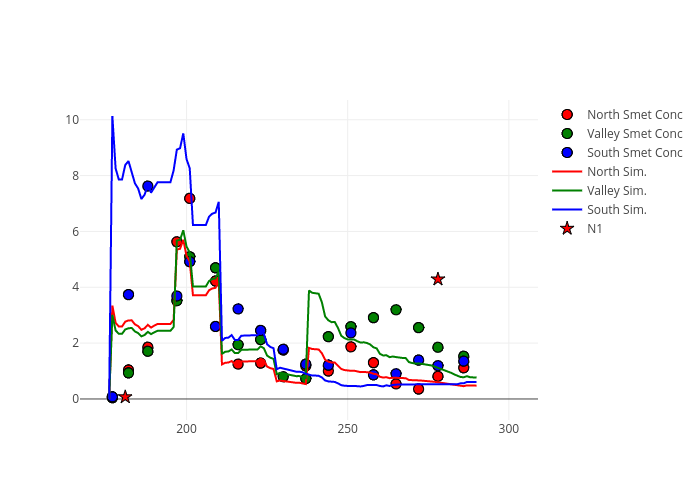

In [18]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)